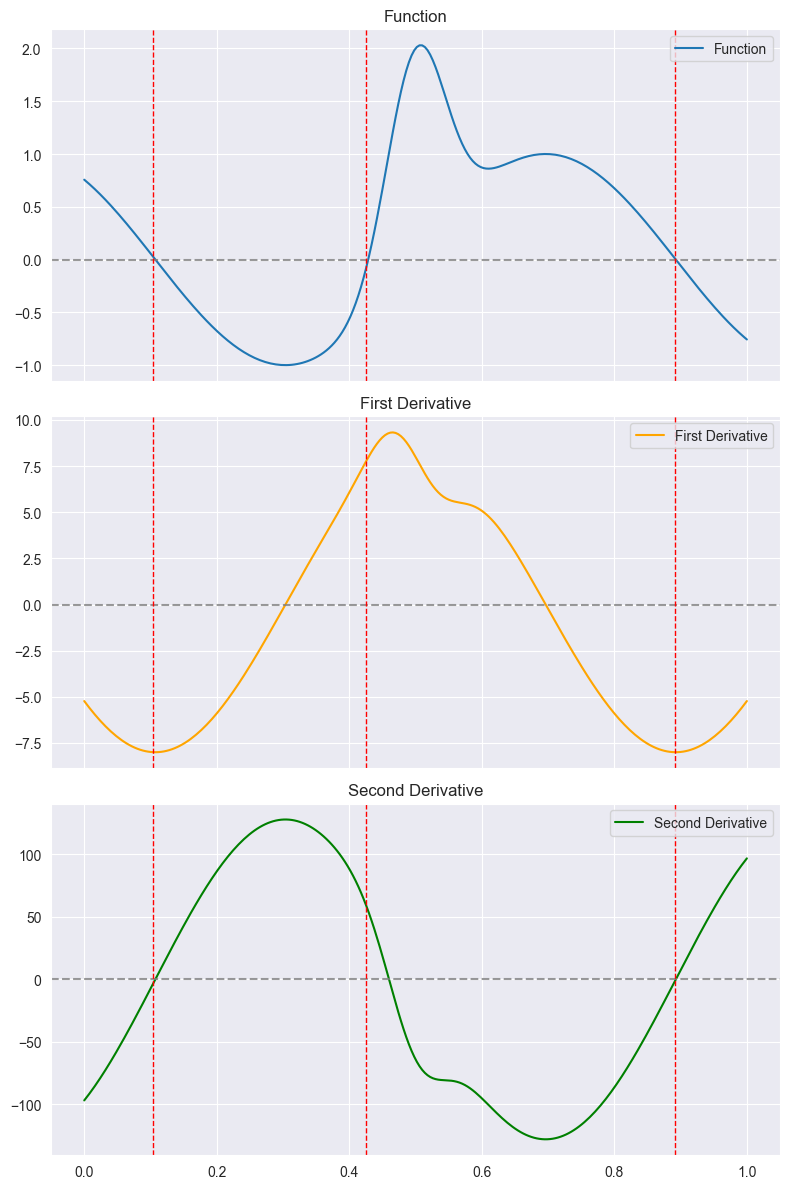

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Define the original function
def my_function(x):
    return np.sin(2 * (4 * x - 2)) + 2 * np.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Define the first derivative
def first_derivative(x):
    return 8 * np.cos(2 * (4 * x - 2)) - 64 * (x - 0.5) * np.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Define the second derivative
def second_derivative(x):
    return -128 * np.sin(2 * (4 * x - 2)) - 64 * np.exp(-(16) ** 2 * (x - 0.5) ** 2) + 2048 * (x - 0.5) ** 2 * np.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Generate x values
x_values = np.linspace(0, 1, 250)

# Generate y values for the function, first, and second derivatives
y_function = my_function(x_values)
y_first_derivative = first_derivative(x_values)
y_second_derivative = second_derivative(x_values)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Plot the function
axs[0].plot(x_values, y_function, label='Function')
axs[0].set_title('Function')
axs[0].legend()

# Plot the first derivative
axs[1].plot(x_values, y_first_derivative, color='orange', label='First Derivative')
axs[1].set_title('First Derivative')
axs[1].legend()

# Plot the second derivative
axs[2].plot(x_values, y_second_derivative, color='green', label='Second Derivative')
axs[2].set_title('Second Derivative')
axs[2].legend()

for ax in axs:
    ax.axhline(0, color='grey', linestyle = '--', alpha = 0.8)
# Find zero-crossings
zero_crossings = np.where(np.diff(np.sign(y_function)))[0]
for xc in zero_crossings:
    axs[0].axvline(x=x_values[xc], color='red', linestyle='--', linewidth=1)
    axs[1].axvline(x=x_values[xc], color='red', linestyle='--', linewidth=1)
    axs[2].axvline(x=x_values[xc], color='red', linestyle='--', linewidth=1)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib qt5

# Define the original function
def my_function(x):
    return np.sin(2 * (4 * x - 2)) + 2 * np.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Define the first derivative
def first_derivative(x):
    return 8 * np.cos(2 * (4 * x - 2)) - 64 * (x - 0.5) * np.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Define the second derivative
def second_derivative(x):
    return -128 * np.sin(2 * (4 * x - 2)) - 64 * np.exp(-(16) ** 2 * (x - 0.5) ** 2) + 2048 * (x - 0.5) ** 2 * np.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Create an initial vertical line position
initial_position = 0.5

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create sliders for the vertical line position
axcolor = 'lightgoldenrodyellow'
ax_position = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
slider_position = Slider(ax_position, 'Position', 0, 1, valinit=initial_position)

# Update function based on slider position
def update(val):
    position = slider_position.val
    axs[0].lines[-1].set_xdata([position, position])
    axs[1].lines[-1].set_xdata([position, position])
    axs[2].lines[-1].set_xdata([position, position])
    fig.canvas.draw_idle()

# Attach the update function to the slider
slider_position.on_changed(update)

# Initial plots
x_values = np.linspace(0, 1, 250)
y_function = my_function(x_values)
y_first_derivative = first_derivative(x_values)
y_second_derivative = second_derivative(x_values)

axs[0].plot(x_values, y_function, label='Function')
axs[1].plot(x_values, y_first_derivative, color='orange', label='First Derivative')
axs[2].plot(x_values, y_second_derivative, color='green', label='Second Derivative')

# Add vertical line at the initial position
for ax in axs:
    ax.axvline(x=initial_position, color='red', linestyle='--', linewidth=1)

# Add legend and titles
for ax in axs:
    ax.legend()
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_38664\366650989.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


C:\Users\esual\AppData\Local\Temp\ipykernel_2920\1918336080.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


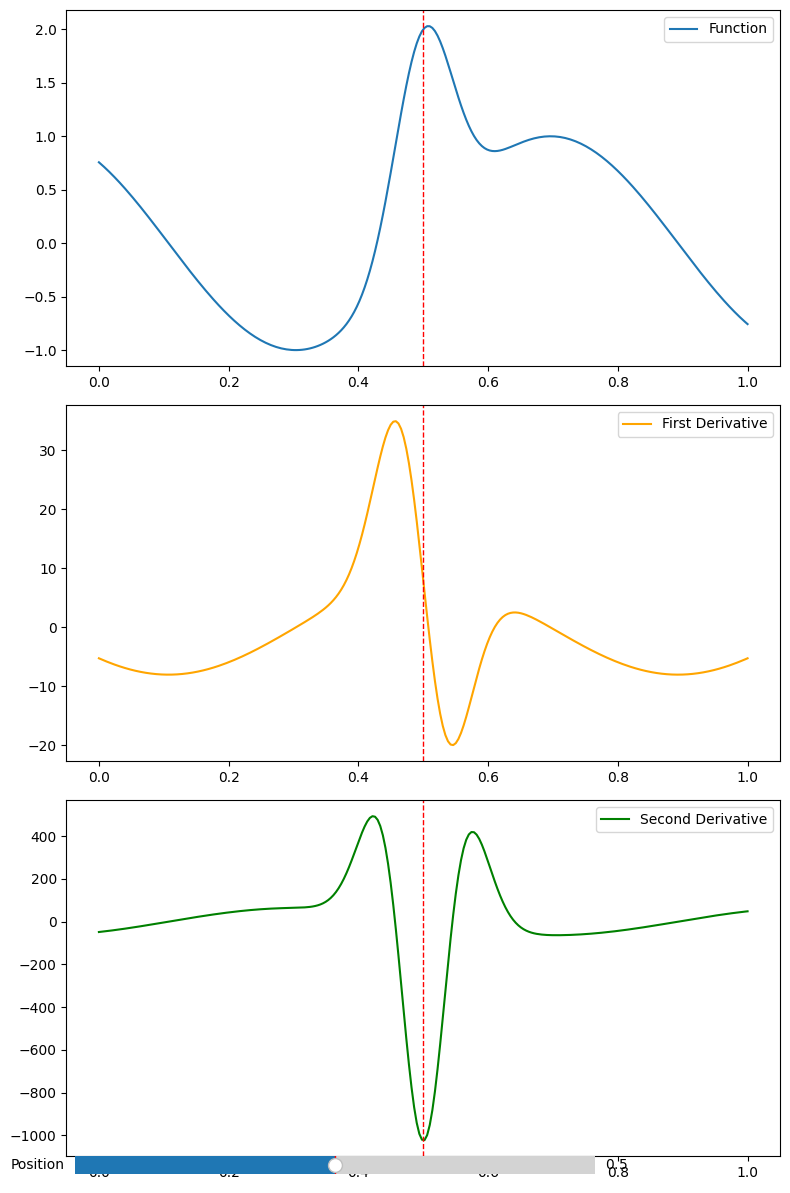

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sympy as sp

# Define symbolic variable
x_sym = sp.symbols('x')

# Define the original function symbolically
def my_function_sym(x):
    return sp.sin(2 * (4 * x - 2)) + 2 * sp.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Calculate symbolic first and second derivatives
first_derivative_sym = sp.diff(my_function_sym(x_sym), x_sym)
second_derivative_sym = sp.diff(my_function_sym(x_sym), x_sym, 2)

# Lambdify the symbolic functions for numerical evaluation
my_function = sp.lambdify(x_sym, my_function_sym(x_sym), 'numpy')
first_derivative = sp.lambdify(x_sym, first_derivative_sym, 'numpy')
second_derivative = sp.lambdify(x_sym, second_derivative_sym, 'numpy')

# Create an initial vertical line position
initial_position = 0.5

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create sliders for the vertical line position
axcolor = 'lightgoldenrodyellow'
ax_position = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
slider_position = Slider(ax_position, 'Position', 0, 1, valinit=initial_position)

# Update function based on slider position
def update(val):
    position = slider_position.val
    axs[0].lines[-1].set_xdata([position, position])
    axs[1].lines[-1].set_xdata([position, position])
    axs[2].lines[-1].set_xdata([position, position])
    fig.canvas.draw_idle()

# Attach the update function to the slider
slider_position.on_changed(update)

# Initial plots
x_values = np.linspace(0, 1, 250)
y_function = my_function(x_values)
y_first_derivative = first_derivative(x_values)
y_second_derivative = second_derivative(x_values)

axs[0].plot(x_values, y_function, label='Function')
axs[1].plot(x_values, y_first_derivative, color='orange', label='First Derivative')
axs[2].plot(x_values, y_second_derivative, color='green', label='Second Derivative')

# Add vertical line at the initial position
for ax in axs:
    ax.axvline(x=initial_position, color='red', linestyle='--', linewidth=1)

# Add legend and titles
for ax in axs:
    ax.legend()
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
%matplotlib qt5

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sympy as sp

# Define symbolic variable
x_sym = sp.symbols('x')

# Define the original function symbolically
def my_function_sym(x):
    return sp.sin(2 * (4 * x - 2)) + 2 * sp.exp(-(16) ** 2 * (x - 0.5) ** 2)

# Calculate symbolic first and second derivatives
first_derivative_sym = sp.diff(my_function_sym(x_sym), x_sym)
second_derivative_sym = sp.diff(first_derivative_sym, x_sym)

# Lambdify the symbolic functions for numerical evaluation
my_function = sp.lambdify(x_sym, my_function_sym(x_sym), 'numpy')
first_derivative = sp.lambdify(x_sym, first_derivative_sym, 'numpy')
second_derivative = sp.lambdify(x_sym, second_derivative_sym, 'numpy')

# Create an initial vertical line position
initial_position = 0.5

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create sliders for the vertical line position
axcolor = 'lightgoldenrodyellow'
ax_position = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
slider_position = Slider(ax_position, 'Position', 0, 1, valinit=initial_position)

# Update function based on slider position
def update(val):
    position = slider_position.val
    axs[0].lines[-1].set_xdata([position, position])
    axs[1].lines[-1].set_xdata([position, position])
    axs[2].lines[-1].set_xdata([position, position])
    fig.canvas.draw_idle()

# Attach the update function to the slider
slider_position.on_changed(update)

# Initial plots
x_values = np.linspace(0, 1, 250)
y_function = my_function(x_values)
y_first_derivative = first_derivative(x_values)
y_second_derivative = second_derivative(x_values)

axs[0].plot(x_values, y_function, label='Function')
axs[1].plot(x_values, y_first_derivative, color='orange', label='First Derivative')
axs[2].plot(x_values, y_second_derivative, color='green', label='Second Derivative')
axs[2].axhline(0, color='black', linestyle='--')

# Add vertical line at the initial position
for ax in axs:
    ax.axvline(x=initial_position, color='red', linestyle='--', linewidth=1)

# Add legend and titles
for ax in axs:
    ax.legend()
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_13220\3237066765.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return 100*x**2 + y**2

# Define the gradient of the function
def gradient(x, y):
    return np.array([200*x, 2*y])

# Define the Hessian matrix of the function
def hessian(x, y):
    return np.array([[200, 0],
                     [0, 2]])

# Define the eigenvectors and eigenvalues of the Hessian matrix
eigenvalues, eigenvectors = np.linalg.eigh(hessian(0, 0))
v_min = eigenvectors[:, 0]  # Eigenvector corresponding to smallest eigenvalue
v_max = eigenvectors[:, 1]  # Eigenvector corresponding to largest eigenvalue

# Define points along the eigenvectors
t = np.linspace(-1, 1, 10)
min_points = np.array([t*v_min[0], t*v_min[1]])
max_points = np.array([t*v_max[0], t*v_max[1]])

# Plot the function
fig = plt.figure(figsize=(12, 6))

# Plot for smallest curvature
ax = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.quiver(0, 0, 0, v_min[0], v_min[1], 0, color='red', label='v_min')
ax.set_title("Gradient along v_min (smallest curvature)")
ax.legend()

# Plot for largest curvature
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.quiver(0, 0, 0, v_max[0], v_max[1], 0, color='red', label='v_max')
ax.set_title("Gradient along v_max (largest curvature)")
ax.legend()

plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return x**2 + y**2

# Define the gradient of the function
def gradient(x, y):
    return np.array([2*x, 2*y])

# Define the Hessian matrix of the function
def hessian(x, y):
    return np.array([[2, 0],
                     [0, 2]])

# Define the eigenvectors and eigenvalues of the Hessian matrix
eigenvalues, eigenvectors = np.linalg.eigh(hessian(0, 0))
v_min = eigenvectors[:, 0]  # Eigenvector corresponding to smallest eigenvalue
v_max = eigenvectors[:, 1]  # Eigenvector corresponding to largest eigenvalue

# Define points along the eigenvectors
t = np.linspace(-1, 1, 10)
min_points = np.array([t*v_min[0], t*v_min[1]])
max_points = np.array([t*v_max[0], t*v_max[1]])

# Plot the function
fig = plt.figure(figsize=(12, 6))

# Plot for smallest curvature
ax = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.quiver(0, 0, 0, v_min[0], v_min[1], 0, color='red', label='v_min')
ax.quiver(0, 0, 0, *gradient(0, 0), 0, 0, length=0.1, color='blue', label='Gradient')
ax.set_title("Gradient along v_min (smallest curvature)")
ax.legend()

# Plot for largest curvature
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.quiver(0, 0, 0, v_max[0], v_max[1], 0, color='red', label='v_max')
ax.quiver(0, 0, 0, *gradient(0, 0), 0, 0, length=0.1, color='blue', label='Gradient')
ax.set_title("Gradient along v_max (largest curvature)")
ax.legend()

plt.show()


TypeError: Axes3D.quiver() takes 7 positional arguments but 8 positional arguments (and 1 keyword-only argument) were given

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sympy as sp

# Define symbolic variables (assuming a two-variable function)
x1_sym, x2_sym = sp.symbols('x1 x2')

# Define the original function symbolically
def my_function_sym(x1, x2):
    return sp.sin(2 * (4 * x1 - 2)) + 2 * sp.exp(-(16) ** 2 * (x2 - 0.5) ** 2)

# Calculate symbolic first and second derivatives
first_derivative_sym = [sp.diff(my_function_sym(x1_sym, x2_sym), x1_sym),
                        sp.diff(my_function_sym(x1_sym, x2_sym), x2_sym)]
second_derivative_sym = [[sp.diff(first_derivative_sym[0], x1_sym), sp.diff(first_derivative_sym[0], x2_sym)],
                         [sp.diff(first_derivative_sym[1], x1_sym), sp.diff(first_derivative_sym[1], x2_sym)]]

# Lambdify the symbolic functions for numerical evaluation
my_function = sp.lambdify((x1_sym, x2_sym), my_function_sym(x1_sym, x2_sym), 'numpy')
first_derivative = [sp.lambdify((x1_sym, x2_sym), d, 'numpy') for d in first_derivative_sym]
second_derivative = [[sp.lambdify((x1_sym, x2_sym), d, 'numpy') for d in row] for row in second_derivative_sym]

# Create initial position
initial_position = [0.5, 0.5]  # Initial position for both variables

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create sliders for the vertical line position
ax_positions = [plt.axes([0.1, 0.01 + i * 0.03, 0.65, 0.03], facecolor='lightgoldenrodyellow') for i in range(2)]
slider_positions = [Slider(ax, f'Position {i+1}', 0, 1, valinit=initial_position[i]) for i, ax in enumerate(ax_positions)]

# Update function based on slider positions
def update(val):
    positions = [slider.val for slider in slider_positions]
    for line in axs[0].lines + axs[1].lines + axs[2].lines:
        line.set_xdata([positions[0], positions[0]])
        line.set_ydata([positions[1], positions[1]])
    fig.canvas.draw_idle()

# Attach the update function to the sliders
for slider in slider_positions:
    slider.on_changed(update)

# Initial plots
x1_values = np.linspace(0, 1, 250)
x2_values = np.linspace(0, 1, 250)
X1, X2 = np.meshgrid(x1_values, x2_values)
Y_function = my_function(X1, X2)
Y_first_derivative = [d(X1, X2) for d in first_derivative]
Y_second_derivative = [[d(X1, X2) for d in row] for row in second_derivative]

for ax, Y, label in zip(axs, [Y_function] + Y_first_derivative + Y_second_derivative,
                        ['Function'] + ['First Derivative ' + str(i+1) for i in range(2)] +
                        ['Second Derivative ' + str(i+1) for i in range(2)]):
    ax.contourf(X1, X2, Y, levels=20)
    ax.set_title(label)

# Add vertical lines at the initial positions
for ax in axs:
    ax.axvline(x=initial_position[0], color='red', linestyle='--', linewidth=1)
    ax.axhline(y=initial_position[1], color='red', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_50664\2460907547.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


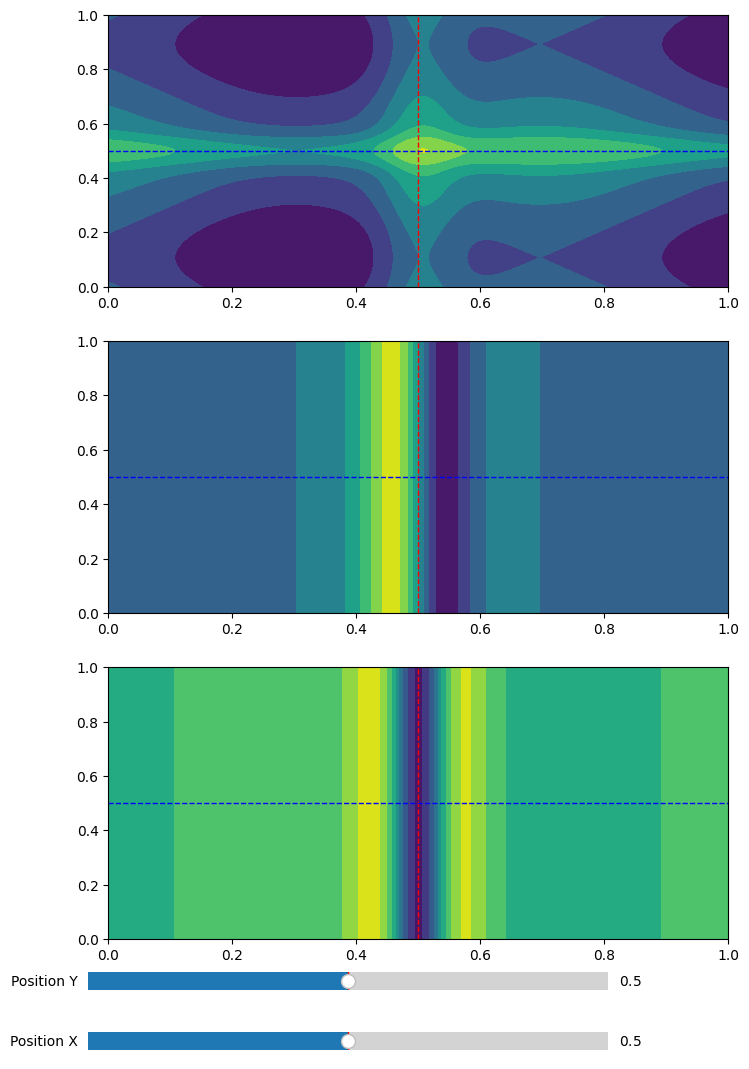

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sympy as sp

%matplotlib inline

# Define symbolic variables
x_sym, y_sym = sp.symbols('x y')

# Define the original function symbolically
def my_function_sym(x, y):
    return sp.sin(2 * (4 * x - 2)) + 2 * sp.exp(-(16) ** 2 * (x - 0.5) ** 2) + sp.cos(2 * (4 * y - 2)) + 2 * sp.exp(-(16) ** 2 * (y - 0.5) ** 2)

# Calculate symbolic first and second derivatives
first_derivative_sym_x = sp.diff(my_function_sym(x_sym, y_sym), x_sym)
first_derivative_sym_y = sp.diff(my_function_sym(x_sym, y_sym), y_sym)
second_derivative_sym_x = sp.diff(first_derivative_sym_x, x_sym)
second_derivative_sym_y = sp.diff(first_derivative_sym_y, y_sym)

# Lambdify the symbolic functions for numerical evaluation
my_function = sp.lambdify((x_sym, y_sym), my_function_sym(x_sym, y_sym), 'numpy')
first_derivative_x = sp.lambdify((x_sym, y_sym), first_derivative_sym_x, 'numpy')
first_derivative_y = sp.lambdify((x_sym, y_sym), first_derivative_sym_y, 'numpy')
second_derivative_x = sp.lambdify((x_sym, y_sym), second_derivative_sym_x, 'numpy')
second_derivative_y = sp.lambdify((x_sym, y_sym), second_derivative_sym_y, 'numpy')

# Create initial positions
initial_position_x = 0.5
initial_position_y = 0.5

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create sliders for the vertical line position
axcolor = 'lightgoldenrodyellow'
ax_position_x = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
slider_position_x = Slider(ax_position_x, 'Position X', 0, 1, valinit=initial_position_x)

ax_position_y = plt.axes([0.1, 0.06, 0.65, 0.03], facecolor=axcolor)
slider_position_y = Slider(ax_position_y, 'Position Y', 0, 1, valinit=initial_position_y)

# Update function based on slider position
def update(val):
    position_x = slider_position_x.val
    position_y = slider_position_y.val
    axs[0].lines[-1].set_xdata([position_x, position_x])
    axs[1].lines[-1].set_xdata([position_x, position_x])
    axs[2].lines[-1].set_xdata([position_x, position_x])
    fig.canvas.draw_idle()

# Attach the update function to the sliders
slider_position_x.on_changed(update)
slider_position_y.on_changed(update)

# Initial plots
x_values = np.linspace(0, 1, 250)
y_values = np.linspace(0, 1, 250)
X, Y = np.meshgrid(x_values, y_values)
Z_function = my_function(X, Y)
Z_first_derivative_x = first_derivative_x(X, Y)
Z_first_derivative_y = first_derivative_y(X, Y)
Z_second_derivative_x = second_derivative_x(X, Y)
Z_second_derivative_y = second_derivative_y(X, Y)

axs[0].contourf(X, Y, Z_function, cmap='viridis')
axs[1].contourf(X, Y, Z_first_derivative_x, cmap='viridis')
axs[2].contourf(X, Y, Z_second_derivative_x, cmap='viridis')

# Add vertical line at the initial positions
for ax in axs:
    ax.axvline(x=initial_position_x, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=initial_position_y, color='blue', linestyle='--', linewidth=1)

# Show the plots
#plt.tight_layout()
plt.show()


C:\Users\esual\AppData\Local\Temp\ipykernel_50664\1978926833.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


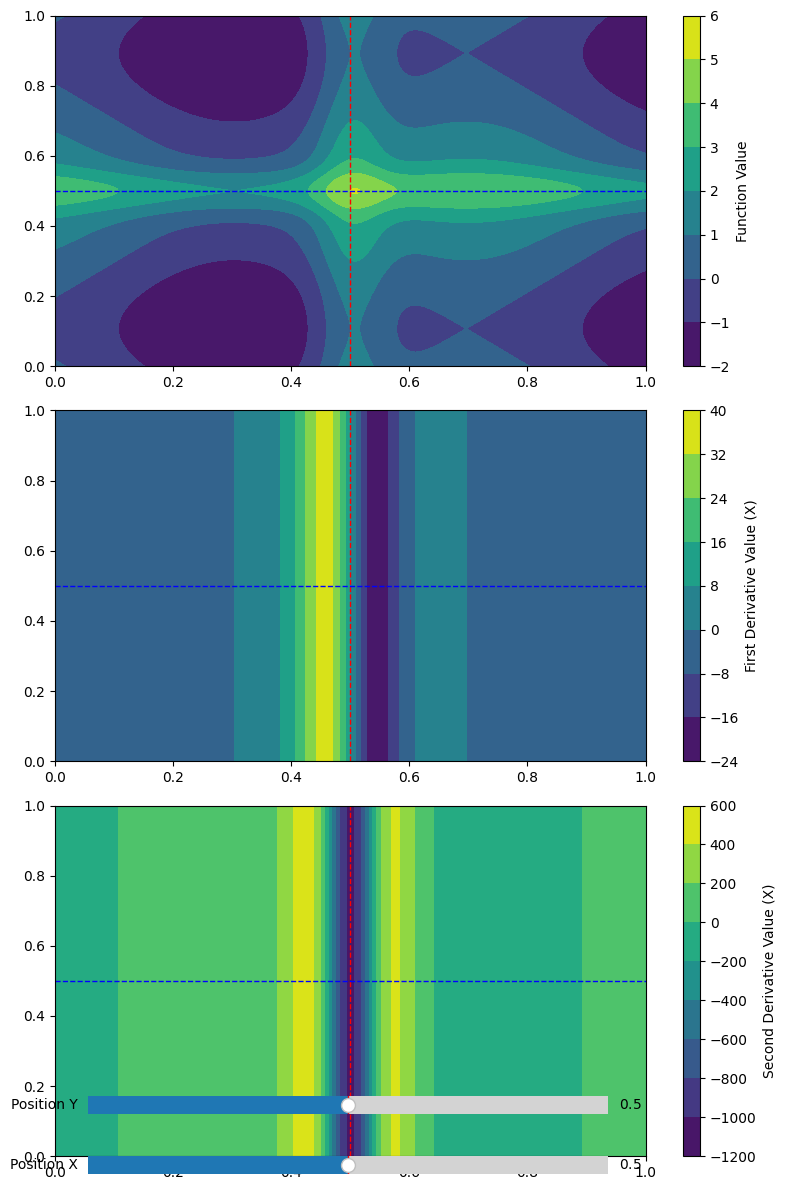

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sympy as sp

# Define symbolic variables
x_sym, y_sym = sp.symbols('x y')

# Define the original function symbolically
def my_function_sym(x, y):
    return sp.sin(2 * (4 * x - 2)) + 2 * sp.exp(-(16) ** 2 * (x - 0.5) ** 2) + sp.cos(2 * (4 * y - 2)) + 2 * sp.exp(-(16) ** 2 * (y - 0.5) ** 2)

# Calculate symbolic first and second derivatives
first_derivative_sym_x = sp.diff(my_function_sym(x_sym, y_sym), x_sym)
first_derivative_sym_y = sp.diff(my_function_sym(x_sym, y_sym), y_sym)
second_derivative_sym_x = sp.diff(first_derivative_sym_x, x_sym)
second_derivative_sym_y = sp.diff(first_derivative_sym_y, y_sym)

# Lambdify the symbolic functions for numerical evaluation
my_function = sp.lambdify((x_sym, y_sym), my_function_sym(x_sym, y_sym), 'numpy')
first_derivative_x = sp.lambdify((x_sym, y_sym), first_derivative_sym_x, 'numpy')
first_derivative_y = sp.lambdify((x_sym, y_sym), first_derivative_sym_y, 'numpy')
second_derivative_x = sp.lambdify((x_sym, y_sym), second_derivative_sym_x, 'numpy')
second_derivative_y = sp.lambdify((x_sym, y_sym), second_derivative_sym_y, 'numpy')

# Create initial positions
initial_position_x = 0.5
initial_position_y = 0.5

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create sliders for the vertical line position
axcolor = 'lightgoldenrodyellow'
ax_position_x = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
slider_position_x = Slider(ax_position_x, 'Position X', 0, 1, valinit=initial_position_x)

ax_position_y = plt.axes([0.1, 0.06, 0.65, 0.03], facecolor=axcolor)
slider_position_y = Slider(ax_position_y, 'Position Y', 0, 1, valinit=initial_position_y)

# Update function based on slider position
def update(val):
    position_x = slider_position_x.val
    position_y = slider_position_y.val
    axs[0].lines[-1].set_xdata([position_x, position_x])
    axs[1].lines[-1].set_xdata([position_x, position_x])
    axs[2].lines[-1].set_xdata([position_x, position_x])
    fig.canvas.draw_idle()

# Attach the update function to the sliders
slider_position_x.on_changed(update)
slider_position_y.on_changed(update)

# Initial plots
x_values = np.linspace(0, 1, 250)
y_values = np.linspace(0, 1, 250)
X, Y = np.meshgrid(x_values, y_values)
Z_function = my_function(X, Y)
Z_first_derivative_x = first_derivative_x(X, Y)
Z_first_derivative_y = first_derivative_y(X, Y)
Z_second_derivative_x = second_derivative_x(X, Y)
Z_second_derivative_y = second_derivative_y(X, Y)

contour0 = axs[0].contourf(X, Y, Z_function, cmap='viridis')
contour1 = axs[1].contourf(X, Y, Z_first_derivative_x, cmap='viridis')
contour2 = axs[2].contourf(X, Y, Z_second_derivative_x, cmap='viridis')

# Add vertical line at the initial positions
for ax in axs:
    ax.axvline(x=initial_position_x, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=initial_position_y, color='blue', linestyle='--', linewidth=1)

# Create color bar
fig.colorbar(contour0, ax=axs[0], orientation='vertical', label='Function Value')
fig.colorbar(contour1, ax=axs[1], orientation='vertical', label='First Derivative Value (X)')
fig.colorbar(contour2, ax=axs[2], orientation='vertical', label='Second Derivative Value (X)')

# Show the plots
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sympy as sp

# Define symbolic variables
x_sym, y_sym = sp.symbols('x y')

# Define the original function symbolically
def my_function_sym(x, y):
    return sp.sin(2 * (4 * x - 2)) + 2 * sp.exp(-(16) ** 2 * (x - 0.5) ** 2) + sp.cos(2 * (4 * y - 2)) + 2 * sp.exp(-(16) ** 2 * (y - 0.5) ** 2)

# Calculate symbolic first and second derivatives
first_derivative_sym_x = sp.diff(my_function_sym(x_sym, y_sym), x_sym)
first_derivative_sym_y = sp.diff(my_function_sym(x_sym, y_sym), y_sym)
second_derivative_sym_x = sp.diff(first_derivative_sym_x, x_sym)
second_derivative_sym_y = sp.diff(first_derivative_sym_y, y_sym)|

# Lambdify the symbolic functions for numerical evaluation
my_function = sp.lambdify((x_sym, y_sym), my_function_sym(x_sym, y_sym), 'numpy')
first_derivative_x = sp.lambdify((x_sym, y_sym), first_derivative_sym_x, 'numpy')
first_derivative_y = sp.lambdify((x_sym, y_sym), first_derivative_sym_y, 'numpy')
second_derivative_x = sp.lambdify((x_sym, y_sym), second_derivative_sym_x, 'numpy')
second_derivative_y = sp.lambdify((x_sym, y_sym), second_derivative_sym_y, 'numpy')

# Create initial positions
initial_position_x = 0.5
initial_position_y = 0.5

# Create the figure and axes
fig, axs = plt.subplots(4, 1, figsize=(8, 16))

# Create sliders for the vertical line position
axcolor = 'lightgoldenrodyellow'
ax_position_x = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
slider_position_x = Slider(ax_position_x, 'Position X', 0, 1, valinit=initial_position_x)

ax_position_y = plt.axes([0.1, 0.06, 0.65, 0.03], facecolor=axcolor)
slider_position_y = Slider(ax_position_y, 'Position Y', 0, 1, valinit=initial_position_y)

# Update function based on slider position
def update(val):
    position_x = slider_position_x.val
    position_y = slider_position_y.val
    axs[0].lines[-1].set_xdata([position_x, position_x])
    axs[1].lines[-1].set_xdata([position_x, position_x])
    axs[2].lines[-1].set_xdata([position_x, position_x])
    axs[2].lines[-1].set_ydata([position_y, position_y])
    fig.canvas.draw_idle()

# Attach the update function to the sliders
slider_position_x.on_changed(update)
slider_position_y.on_changed(update)

# Initial plots
x_values = np.linspace(0, 1, 250)
y_values = np.linspace(0, 1, 250)
X, Y = np.meshgrid(x_values, y_values)
Z_function = my_function(X, Y)
Z_first_derivative_x = first_derivative_x(X, Y)
Z_first_derivative_y = first_derivative_y(X, Y)
Z_second_derivative_x = second_derivative_x(X, Y)
Z_second_derivative_y = second_derivative_y(X, Y)

contour0 = axs[0].contourf(X, Y, Z_function, cmap='viridis')
contour1 = axs[1].contourf(X, Y, Z_first_derivative_x, cmap='viridis')
contour2 = axs[2].contourf(X, Y, Z_second_derivative_x, cmap='viridis')

axs[3].remove()  # Remove empty subplot

# Add vertical line at the initial positions
for ax in axs.flat[:3]:
    ax.axvline(x=initial_position_x, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=initial_position_y, color='blue', linestyle='--', linewidth=1)

# Create color bar
fig.colorbar(contour0, ax=axs[0], orientation='vertical', label='Function Value')
fig.colorbar(contour1, ax=axs[1], orientation='vertical', label='First Derivative Value (X)')
fig.colorbar(contour2, ax=axs[2], orientation='vertical', label='Second Derivative Value (X)')

# Plot 3D function
ax_3d = fig.add_subplot(4, 1, 4, projection='3d')
ax_3d.plot_surface(X, Y, Z_function, cmap='viridis')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Function Value')

# Show
plt.show()

SyntaxError: invalid syntax (1535531616.py, line 17)